In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from tqdm.notebook import tqdm

In [3]:
def circle(r, x, h, k, how):
    if how=='n':
      return -math.sqrt(r**2 - (x-h)**2) + k
    if how=='p':
      return math.sqrt(r**2 - (x-h)**2) + k
    else:
       raise ValueError("how must be 'n' or 'p'")


def in_Fig(x,y, radio):

  fig_in= []
  
  if math.sqrt(x**2 + y**2) <= radio:
    fig_in.append(True)
  else:
    fig_in.append(False)

  if math.sqrt((x-radio)**2 + y**2) <= radio:
    fig_in.append(True)
  else:
    fig_in.append(False)

  if math.sqrt(x**2 + (y-radio)**2) <= radio:
    fig_in.append(True)
  else:
    fig_in.append(False)

  if math.sqrt((x-radio)**2 + (y-radio)**2) <= radio:
    fig_in.append(True)
  else:
    fig_in.append(False)

  return all(fig_in)

In [4]:
radio = 20
mag = 50
fig = plt.figure(figsize = (5,5))
x = np.linspace(0, 20, num = radio*mag)

circle_ = lambda r, x: circle(r, x, 0, 0, 'p')
circle_x = lambda r, x: circle(r, x, r, 0, 'p')
circle_y = lambda r, x: circle(r, x, 0, r, 'n')
circle_xy = lambda r, x: circle(r, x, r, r, 'n')


circle1 = [circle_(radio, x) for x in x]
circle2 = [circle_x(radio, x) for x in x]
circle3 = [circle_y(radio, x) for x in x]
circle4 = [circle_xy(radio, x) for x in x]


<Figure size 500x500 with 0 Axes>

  0%|          | 0/1000000 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Área de la figura: 126.1548 u^2')

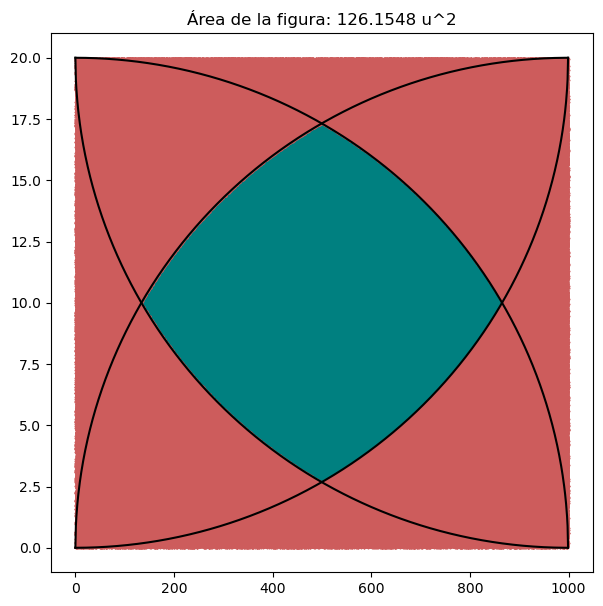

In [5]:
points = 1_000_000
xs,ys = np.random.uniform(0, radio, points), np.random.uniform(0, radio, points)
points_in,xv, yv = [], [], []

for x, y in tqdm(zip(xs,ys), total = points):
    if in_Fig(x,y, radio):
        points_in.append(True)
    else:
        points_in.append(False)
    xv.append(x)
    yv.append(y)

xv, yv = np.array(xv), np.array(yv)

fig = plt.figure(figsize = (7,7))

dentro = np.where(points_in)[0]
fuera = np.where(np.logical_not(points_in))[0]

plt.plot(xv[dentro]*mag, yv[dentro], 'o', color = 'teal', markersize = 0.5)
plt.plot(xv[fuera]*mag, yv[fuera], 'o', color = 'indianred', markersize = 0.5)

plt.plot(circle1, color='black')
plt.plot(circle2, color='black')
plt.plot(circle3, color='black')
plt.plot(circle4, color='black')

in_prctg = len(dentro)/points
area = radio**2*in_prctg
plt.title(f'Área de la figura: {area} u^2')


Text(0.5, 1.0, 'Área de la figura: 126.02464012986432 u^2')

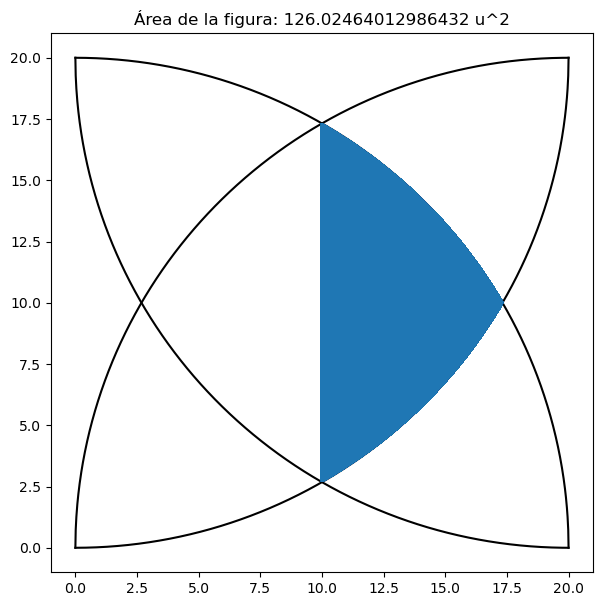

In [6]:
# Code
a, b = 0, 20
fig = plt.figure(figsize = (7,7))

x = np.linspace(a, b, num = 1500)

circle1 = [circle_(radio, x) for x in x]
circle2 = [circle_x(radio, x) for x in x]
circle3 = [circle_y(radio, x) for x in x]
circle4 = [circle_xy(radio, x) for x in x]



plt.plot(x, circle1, color='black')
plt.plot(x, circle3, color='black')
plt.plot(x, circle2, color='black')
plt.plot(x, circle4, color='black')

b = x[np.where(np.round(circle1, 2) == np.round(circle3, 2))[0][0]]
a=10

n = 1_000_000
w = (b-a)/n

xi_random = np.random.random(size=n)*(b-a) + a

circle1_r = [circle_(radio, x) for x in xi_random]
circle3_r = [circle_y(radio, x) for x in xi_random]


plt.vlines(xi_random, circle3_r, circle1_r)

hieght = np.array(circle1_r) - np.array(circle3_r)
area = np.sum(hieght*w)*2

plt.title(f'Área de la figura: {area} u^2')



* Centro de costos
    - codigo
    - descripcion
* conceptos de nomina
    - usuario
    - contraseña
    - Codigo de datos
    - Prioridad concepto
    - Cuenta
    - Grabado IESS
    - Mov de Excepcion
    - Descripcion de concepto
    - Tipo de operacion
    - Trab Afec Impuesto a la renta
    - Empleado IESS
* Categoria ocupacional
    - codigo usuario
    - Contraseña
    - Codigo Cateoria de ocupacion
    - Decripcion
    - 
* registro historico de nomina
    - codigo de compañia
    - Nombrede compañia
    - año
    - mes

* gestion cuentas contables
    - codigo de compañia
    - COME codigo de dato
    - COME descripcion de concepto
    - codigo categoria ocupacional
    - CATO descripcion
    - Codigo de operacion
    - Cuenta
    - Codigo
    - PLAC Descripcion Cuenta contable

*   Cambiar cierre Nomina
    - codigo de compañia
    - codigo emisor
    - FECI fecha cierre gastos

* Nivel salarial
 - COdigo
 - Descripcion

* parametros personal
    - Compañia
    - % Rat Trab IESS
    - % Aporte empresa IESS
    - % Fondo de reserva
    - Meses minimo calculo de Impuesto a la renta
    - Numero de meses para calculo de fondo de reserva